In [44]:
import numpy as np
import matplotlib.pyplot as plt

In [45]:
# Create a 5x5 image
np.random.seed(42)
image = np.random.randint(0, 256, (5, 5), dtype=np.uint8)
print("Original 5x5 Image:")
print(image)

Original 5x5 Image:
[[102 220 225  95 179]
 [ 61 234 203  92   3]
 [ 98 243  14 149 245]
 [ 46 106 244  99 187]
 [ 71 212 153 199 188]]


In [46]:
#mask filter
filter_size = 3
filter_kernel = np.ones((filter_size, filter_size)) / (filter_size * filter_size)
print("\n3x3 Average Filter Kernel:")
print(filter_kernel)


3x3 Average Filter Kernel:
[[0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]]


In [47]:
# Add zero padding to the image
pad_width = filter_size // 2
padded_image = np.pad(image, pad_width, mode='constant', constant_values=0)
print("\nPadded Image (with zeros):")
print(padded_image)


Padded Image (with zeros):
[[  0   0   0   0   0   0   0]
 [  0 102 220 225  95 179   0]
 [  0  61 234 203  92   3   0]
 [  0  98 243  14 149 245   0]
 [  0  46 106 244  99 187   0]
 [  0  71 212 153 199 188   0]
 [  0   0   0   0   0   0   0]]


In [48]:
# Function to apply the filter to a specific pixel using the padded image
def apply_filter(padded_img, original_row, original_col, kernel, pad_width):

    row = original_row + pad_width
    col = original_col + pad_width


    region = padded_img[row-pad_width:row+pad_width+1, col-pad_width:col+pad_width+1]


    result = np.sum(region * kernel)

    return result

In [49]:
# Apply the filter to the first pixel
filtered_value = apply_filter(padded_image, 0, 0, filter_kernel, pad_width)
print(f"\nFiltered value at position (0,0): {filtered_value}")


Filtered value at position (0,0): 68.55555555555554


In [50]:
filtered_image = image.copy()
filtered_image[0, 0] = int(filtered_value)

In [51]:
print("\nImage after filtering the first pixel:")
print(filtered_image)


Image after filtering the first pixel:
[[ 68 220 225  95 179]
 [ 61 234 203  92   3]
 [ 98 243  14 149 245]
 [ 46 106 244  99 187]
 [ 71 212 153 199 188]]


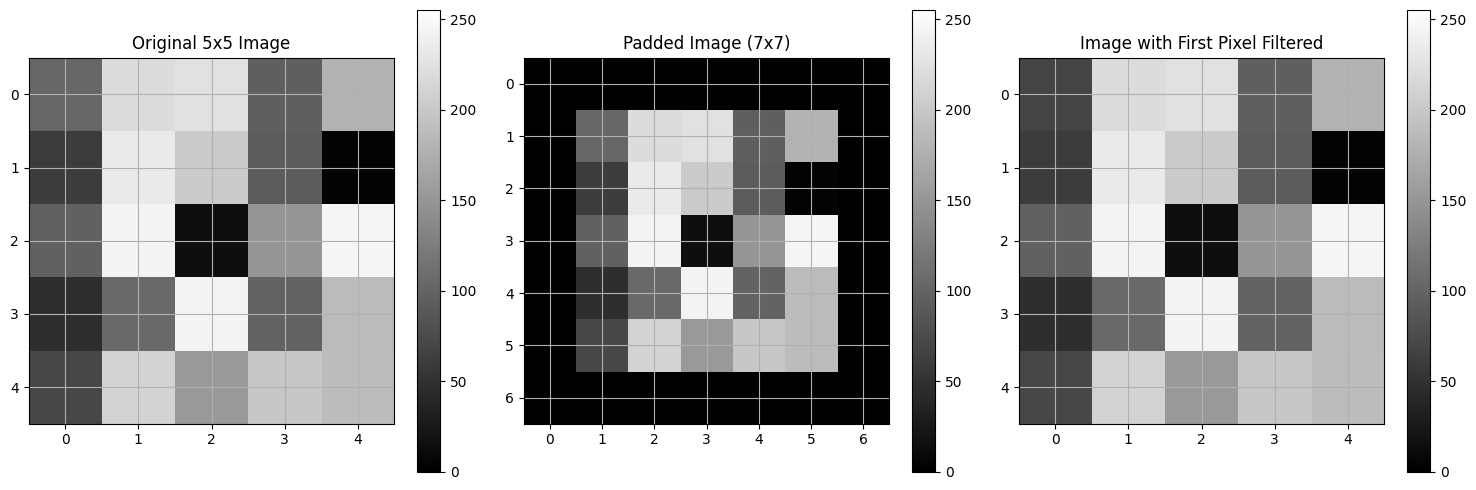

In [52]:
# Visualize the original, padded, and filtered images
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray', vmin=0, vmax=255)
plt.title('Original 5x5 Image')
plt.colorbar()
plt.grid(True)

plt.subplot(1, 3, 2)
plt.imshow(padded_image, cmap='gray', vmin=0, vmax=255)
plt.title('Padded Image (7x7)')
plt.colorbar()
plt.grid(True)

plt.subplot(1, 3, 3)
plt.imshow(filtered_image, cmap='gray', vmin=0, vmax=255)
plt.title('Image with First Pixel Filtered')
plt.colorbar()
plt.grid(True)

plt.tight_layout()
plt.show()

In [53]:
# Show detailed computation for the first pixel
print("\nDetailed computation for the first pixel:")
print("3x3 neighborhood around the first pixel (from padded image):")
neighborhood = padded_image[0:3, 0:3]
print(neighborhood)

print("\nMultiplication with filter kernel:")
multiplication = neighborhood * filter_kernel
print(multiplication)

print(f"\nSum of values = {np.sum(multiplication)} ≈ {filtered_value}")


Detailed computation for the first pixel:
3x3 neighborhood around the first pixel (from padded image):
[[  0   0   0]
 [  0 102 220]
 [  0  61 234]]

Multiplication with filter kernel:
[[ 0.          0.          0.        ]
 [ 0.         11.33333333 24.44444444]
 [ 0.          6.77777778 26.        ]]

Sum of values = 68.55555555555554 ≈ 68.55555555555554
